<a href="https://colab.research.google.com/github/ialreadysaidyes/dscryb-prompt-to-video/blob/main/dscryb_using_SpoofsAPI_and_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# show the graphics card we are using
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Nov 20 14:19:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# webscrape dscryb for monster descriptions to feed into stable diffusion
import requests
from bs4 import BeautifulSoup

In [3]:
URL = "https://dscryb.com/scenes/monsters/"
page = requests.get(URL)

In [5]:
# parse for class of interest in the Free Monsters section
soup = BeautifulSoup(page.content, "html.parser")
free_monsters = soup.find("div", class_= "elementor-posts-container elementor-posts elementor-posts--skin-classic elementor-grid")
monster_name = free_monsters.find_all("h3", class_='elementor-post__title')
monsters_url = free_monsters.find_all("a")
# print(free_monsters)
print(monsters_url)
# print(monster_name)

[<a href="https://dscryb.com/scene/a-goblin-fires-an-arrow-at-you/">
				A Goblin Fires an Arrow at You			</a>, <a href="https://dscryb.com/scene/a-torn-page-from-nuldys-compendium-of-insect-inquiries/">
				A Torn Page from Nuldy’s Compendium of Insect Inquiries			</a>, <a href="https://dscryb.com/scene/aberrant-spirit-creature/">
				Aberrant Spirit Creature			</a>, <a href="https://dscryb.com/scene/adult-brass-dragon/">
				Adult Brass Dragon			</a>, <a href="https://dscryb.com/scene/air-elemental/">
				Air Elemental			</a>, <a href="https://dscryb.com/scene/ancient-gold-dragon/">
				Ancient Gold Dragon			</a>, <a href="https://dscryb.com/scene/ancient-red-dragon/">
				Ancient Red Dragon			</a>, <a href="https://dscryb.com/scene/aquatic-lawnmower-mimic/">
				Aquatic Lawnmower Mimic			</a>, <a href="https://dscryb.com/scene/astral-dreadnought/">
				Astral Dreadnought			</a>, <a href="https://dscryb.com/scene/awakened-shrub-with-club/">
				Awakened Shrub with Club			</a>, <a hre

In [ ]:
for monster in monsters_url:
  print(monster['href'])

In [7]:
# create dictionary to store information for later processing
media_dict = {}
for i in range(len(monsters_url)):
  monsters_name = free_monsters.find_all('a')[i]
  for monster in monsters_name:
    key = i
  media_dict[i] = [monster.strip(), monsters_url[i]['href']]
print(media_dict)

{0: ['A Goblin Fires an Arrow at You', 'https://dscryb.com/scene/a-goblin-fires-an-arrow-at-you/'], 1: ['A Torn Page from Nuldy’s Compendium of Insect Inquiries', 'https://dscryb.com/scene/a-torn-page-from-nuldys-compendium-of-insect-inquiries/'], 2: ['Aberrant Spirit Creature', 'https://dscryb.com/scene/aberrant-spirit-creature/'], 3: ['Adult Brass Dragon', 'https://dscryb.com/scene/adult-brass-dragon/'], 4: ['Air Elemental', 'https://dscryb.com/scene/air-elemental/'], 5: ['Ancient Gold Dragon', 'https://dscryb.com/scene/ancient-gold-dragon/'], 6: ['Ancient Red Dragon', 'https://dscryb.com/scene/ancient-red-dragon/'], 7: ['Aquatic Lawnmower Mimic', 'https://dscryb.com/scene/aquatic-lawnmower-mimic/'], 8: ['Astral Dreadnought', 'https://dscryb.com/scene/astral-dreadnought/'], 9: ['Awakened Shrub with Club', 'https://dscryb.com/scene/awakened-shrub-with-club/'], 10: ['Black Dragon Wyrmling', 'https://dscryb.com/scene/black-dragon-wyrmling/'], 11: ['Bones of Big Animal in Swamp', 'https:

In [8]:
# r = requests.get(media_dict['A Goblin Fires an Arrow at You'])
# soup = BeautifulSoup(r.content, 'html.parser')
# # print(soup.prettify())
# # monstertext = soup.find_all('div', class_="page-content-text")
# monstertext = soup.find_all('p')[1]
# for monster in monstertext:
#   print(monster)

In [9]:
# use URL values from media_dict to scrape monster descriptions:
scene_dict = {}
for idx, [k,v] in media_dict.items():
  r = requests.get(v)
  soup = BeautifulSoup(r.content, 'html.parser')
  monstertext = soup.find_all('p')[1]
  for monster in monstertext:
    print(idx)
    print(k)
    print(monster)
    scene_description = monster
  scene_dict[idx] = [k, scene_description]
print(scene_dict)

0
A Goblin Fires an Arrow at You
The little creature nocks an arrow in their bow, carefully aiming until they’re sure it will hit its target, and releases. The arrow flies toward you quicker than a bird, puncturing a small but painful hole in your body.
1
A Torn Page from Nuldy’s Compendium of Insect Inquiries
In many regions of the civilized-yet-recluse world, communities are well acquainted with the infamous folklore of the Dung Beetle. These timid insects incite fear in commoners—they are a deadly infestation—and adventurers. Amassing large hoards of refuse, these beetles possess the innate magic to set dung on fire and fling it with amazing accuracy. Small explosions immediately follow something being hit by one of these flaming dung balls. A single Dung Beetle is manageable, but where there is one, there are said to be many more, and a swarm is a curse. Best to give this beetle plenty of space and keep your latrine clean.
2
Aberrant Spirit Creature
Most creatures in the world are 

In [ ]:
# that looks like it worked pretty well for the most part. tidy it up into a nice panda dataframe
import pandas as pd

df = pd.DataFrame.from_dict(scene_dict, orient='index', columns=["scene", "description"])
df.head()
# df.iloc[0][1]
# this is what we'll be using for prompts to send to Spoofs API for audio generation
# print(df.iloc[0][0] +'. ' + df.iloc[0][1])

In [ ]:
# save this dataframe as a cvs
# df.to_csv('dscrb_scrape.csv', encoding='utf-8')
# copy files to gdrive
import os
from pathlib import Path
Path('/content/drive/MyDrive/Spoofs_animated/').mkdir(parents=True, exist_ok=True)
!cp '/content/dscrb_scrape.csv' '/content/drive/MyDrive/Spoofs_animated/'
!cp '/content/outputA Goblin Fires an Arrow at You.wav' '/content/drive/MyDrive/Spoofs_animated/'

In [1]:
# connect to gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
# now that csv has been created it can be copy'd from gdrive in future creations to not have to recreate everything hitherto
import pandas as pd
import os
from pathlib import Path
!cp "/content/drive/MyDrive/Spoofs_animated/dscrb_scrape.csv" '/content/'
df = pd.read_csv("/content/dscrb_scrape.csv")
del df['Unnamed: 0']
df.iloc[20:50]
# df.iloc[0]

,scene,description
20,Earth Genie,"<p style=""text-align: right;"">~ <a href=""https..."
21,Emaciated Ghoul,"The emaciated humanoid moves on clawed, skelet..."
22,Flesh Cobbler,"<p style=""text-align: right;"">~ An <a href=""ht..."
23,Flesh Golem,Surely no one sane would make this puppet of m...
24,Flying Monkeys,"The simian’s wings flap rhythmically, slowly p..."
25,Frost Giant Zombie,The stench of dead flesh billows from the towe...
26,Ghast,"In the darkness, the creature's pallid skin ca..."
27,Giant Boar,The giant boar makes a sound like rolling thun...
28,Giant Eels Under the Ice,"] The ice heaves, then shatters! Fissures spli..."
29,Giant Goat,The goat is almost comical as it chews absentl...


In [88]:
# Use this chasis to then send lyrics to Spoofs API for TTS generation
# Connect to Spoofs API for David Attenborough
!pip install requests
import requests
# api-endpoint
URL = "https://ijg55w4sf9.execute-api.us-east-2.amazonaws.com/spoofs-api/tts"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
# we'll use david attenborough to generate description audio and then select the description we want
VOICE_NAME = "david_attenborough"
index_of_description = 24

# for i in range(0, len(df)):
  # print(df.Lyric[i])
# defining a params dict for the parameters to be sent to the API
PARAMS = {"voice_name": VOICE_NAME, 
        "text": df.iloc[index_of_description][0] + '. ' + df.iloc[index_of_description][1], 
        "denoise": "35", 
        "audio_id": "1",
        "debug": True} 
  
# sending get request and saving the response as response object
x = requests.post(URL, json = PARAMS, stream=True)

# Write the output to disk
with open(str(df.iloc[index_of_description][0]) + '.wav', 'wb') as handle:
    for block in x.iter_content(1024):
        handle.write(block)

# this looks good so moving onto video creation using stable diffusion

In [90]:
import IPython
IPython.display.Audio(str(df.iloc[index_of_description][0]) + '.wav') # This is required on Google Colab due to compatibility issues

In [91]:
# get the necessary imports for stable diffusion
!pip install --upgrade diffusers transformers scipy
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
# log in with huggingface
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [93]:
# creation of stable diffusion pipeline and turning off of NSFW filter (it gets in the way even when not questionable content is generated)
from diffusers import StableDiffusionPipeline
import torch
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
pipe = pipe.to("cuda")

# disable NSWF filter
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [20]:
# from PIL import Image

# def image_grid(imgs, rows, cols):
#     assert len(imgs) == rows*cols

#     w, h = imgs[0].size
#     grid = Image.new('RGB', size=(cols*w, rows*h))
#     grid_w, grid_h = grid.size
    
#     for i, img in enumerate(imgs):
#         grid.paste(img, box=(i%cols*w, i//cols*h))
#     return grid

In [ ]:
# # image generation using scraped prompts
# index_of_description = 82
# prompt = df.iloc[index_of_description][0]# +'. ' + df.iloc[index_of_description][1]
# # style_description = ", wuxia, fantasy, elegant, intricate, by stanley artgerm lau, greg rutkowski, thomas kindkade, alphonse mucha, loish, norman rockwell"
# style_description = ", digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo"
# prompt += style_description

# #image and mask_image should be PIL images.
# #The mask structure is white for inpainting and black for keeping as is
# # image = pipe(prompt).images[0]  
# # image.save(df.iloc[index_of_description][0] + ".png")

# num_images = 6
# prompt = [prompt] * num_images
# generator = torch.Generator("cuda").manual_seed(1024)
# images = pipe(prompt, guidance_scale=7.5, num_inference_steps = 100, generator=generator).images
# # images = pipe(prompt).images

# grid = image_grid(images, rows=2, cols=3)
# display(grid[0])

In [ ]:
# save the lot or 
# grid.save(str(df.iloc[index_of_description][0]) + '.png')
# pick your favorite
# display(images[4])
# images[4].save(str(df.iloc[index_of_description][0]) + '.png')

In [ ]:
# from IPython.display import Image
# prompt_scene = df.iloc[index_of_description][0]
# print(prompt_scene)
# Image(str(df.iloc[index_of_description][0]) + ".png")

# terrifying but moving on

In [94]:
# initial image made using just the scene prompt and will now have iterations produced using increasingly longer prompts using the scene description by fragment ending in a period. 
full_prompt = prompt = df.iloc[index_of_description][0] +'. ' + df.iloc[index_of_description][1]
print(full_prompt)
prompt_list = full_prompt.split(".")

Flying Monkeys. The simian’s wings flap rhythmically, slowly pushing it through the air. A flock of these winged apes flutters about, moving on the whims of the strongest among them. They obey the orders of their leader, as he barks and points about with a bloodied claw.


In [95]:
prompt_list

['Flying Monkeys',
 ' The simian’s wings flap rhythmically, slowly pushing it through the air',
 ' A flock of these winged apes flutters about, moving on the whims of the strongest among them',
 ' They obey the orders of their leader, as he barks and points about with a bloodied claw',
 '']

  0%|          | 0/101 [00:00<?, ?it/s]

Flying Monkeys, digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo


  0%|          | 0/101 [00:00<?, ?it/s]

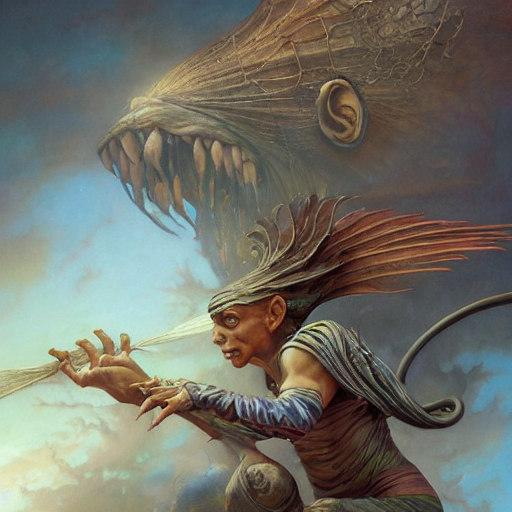

Flying Monkeys The simian’s wings flap rhythmically, slowly pushing it through the air, digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo


  0%|          | 0/101 [00:00<?, ?it/s]

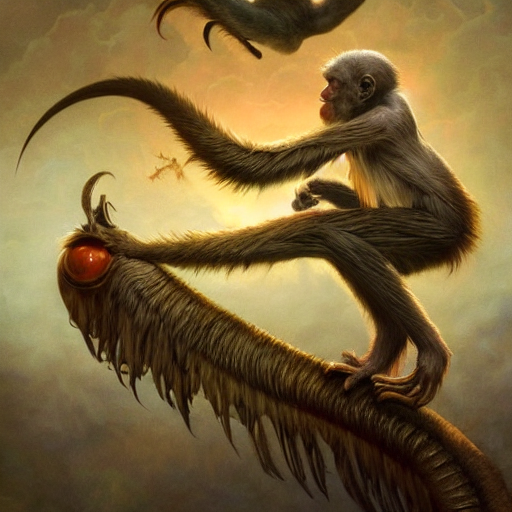

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cola, joseph christian leyendecker, wlop, boris vallejo <|endoftext|>']


Flying Monkeys The simian’s wings flap rhythmically, slowly pushing it through the air A flock of these winged apes flutters about, moving on the whims of the strongest among them, digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo


  0%|          | 0/101 [00:00<?, ?it/s]

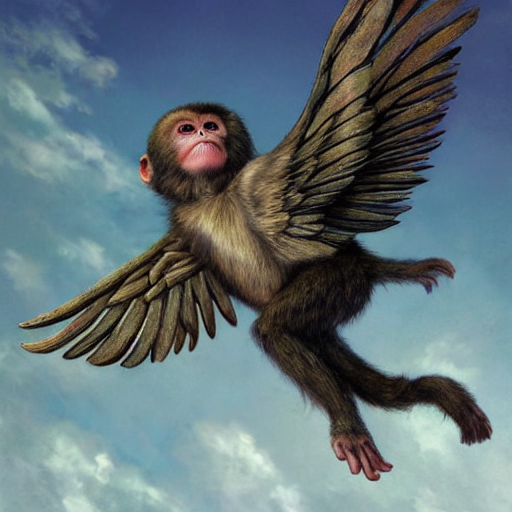

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo <|endoftext|>']


Flying Monkeys The simian’s wings flap rhythmically, slowly pushing it through the air A flock of these winged apes flutters about, moving on the whims of the strongest among them They obey the orders of their leader, as he barks and points about with a bloodied claw, digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo


  0%|          | 0/101 [00:00<?, ?it/s]

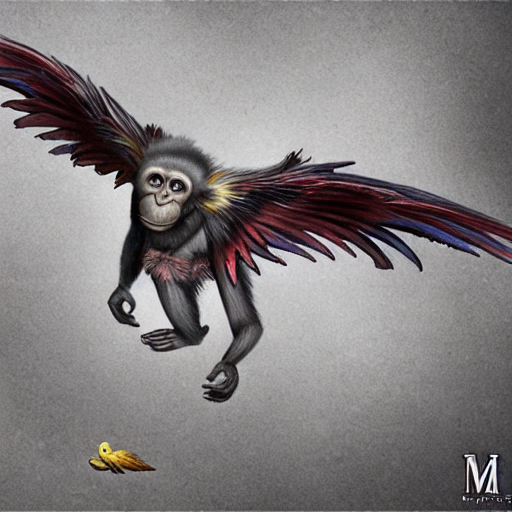

In [96]:
# iterate through producting images using increasingly longer prompts
iters = len(prompt_list)
image_prompt = ""
style_description = ", digital painting, artstation, concept art, smooth, sharp focus, illustration, artgerm, tomasz alen kopera, peter mohrbacher, donato giancola, joseph christian leyendecker, wlop, boris vallejo"
generator = torch.Generator("cuda").manual_seed(1024)
images = pipe(prompt, guidance_scale=8, num_inference_steps = 100, generator=generator).images

for i in range (len(prompt_list) - 1):
  image_prompt += prompt_list[i]
  temp = image_prompt
  image_prompt += style_description
  print(image_prompt)
  image = pipe(image_prompt, guidance_scale=7.5, num_inference_steps = 100, generator=generator).images[0]
  # image = pipe(image_prompt).images[0]  
  display(image)
  image.save(df.iloc[index_of_description][0] + str(i) + ".png")
  image_prompt = temp

# this looks nice ^_^

In [ ]:
# # not incredibly cohesive, will try having individual prompt fragments used to generate images
# iters = len(prompt_list)
# image_prompt = ""
# for i in range (len(prompt_list) -1):
#   image_prompt = prompt_list[i]
#   # temp = image_prompt
#   image_prompt += style_description
#   print(image_prompt)
#   image = pipe(image_prompt, guidance_scale=7.5, num_inference_steps = 100, generator=generator).images[0]
#   # image = pipe(image_prompt).images[0]  
#   display(image)
#   image.save(df.iloc[index_of_description][0] + str(i) + "individualpromps" + ".png")
  
  

In [97]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
# get duration of audio
import ffmpeg
probe = ffmpeg.probe(str(df.iloc[index_of_description][0]) + '.wav')
duration = round(float((probe['streams'][0]['duration'])),2)
print(duration)
per_imagedur = float(duration/len(images))
print(round(per_imagedur),2)

17.37
4 2


In [99]:
# list of sorted images
import glob
images = glob.glob('/content' + '/*.png')
images.sort()
print(images)

['/content/Flying Monkeys0.png', '/content/Flying Monkeys1.png', '/content/Flying Monkeys2.png', '/content/Flying Monkeys3.png']


In [ ]:
# import ffmpeg
# import os
# import glob
# import shutil
# import tempfile
# import subprocess
# import json
# import time
# import datetime

# def make_video(images, audio: str, output: str):
#     """create a video out of a sequence of images using ffmpeg-python that has a duration of audio"""
#     # create a temporary directory
#     temp_dir = tempfile.mkdtemp()
#     # copy images to the temporary directory
#     for i, image in enumerate(images):
#         print(image)
#         shutil.copy(image, os.path.join(temp_dir, f"image{i}.png"))
#     # copy audio to the temporary directory
#     shutil.copy(audio, os.path.join(temp_dir, "audio.mp3"))
#     # get the duration of the audio
#     result = subprocess.run(["ffprobe", "-v", "error", "-show_entries", "format=duration", "-of", "default=noprint_wrappers=1:nokey=1", os.path.join(temp_dir, "audio.mp3")], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
#     duration = float(result.stdout)
#     print(duration)
#     # get the duration of each image
#     duration_per_image = duration / len(images)
#     print(duration_per_image)
#     # create a text file with the image names and their duration
#     with open(os.path.join(os.getcwd(), "images.txt"), "w") as f:
#         for i in range(len(images)):
#             print(images[i])
#             f.write(f"file {images[i]} ")
#             # f.write(f"duration {duration_per_image}")
#             f.write("\n")
#     # create a video from the images
#     subprocess.run(["ffmpeg", "-f", "concat", "-safe", "0", "-i", os.path.join(os.getcwd(), "images.txt"), "-c", "copy", os.path.join(temp_dir, "video.mp4")])
#     # merge the video and the audio
#     subprocess.run(["ffmpeg", "-i", os.path.join(temp_dir, "video.mp4"), "-i", os.path.join(temp_dir, "audio.mp3"), "-c", "copy", output])
#     # remove the temporary directory
#     # shutil.rmtree(temp_dir)

# make_video(images, '/content/Zombie.wav', 'movie.mp4')

In [119]:
!ffmpeg -framerate 1/4.2 -pattern_type glob -i "*.png" -vcodec libx264 \
-pix_fmt yuv420p -r 30 -threads 4 -crf 25 -refs 1 -bf 0 -coder 0 -g 25 \
-keyint_min 15 -movflags +faststart temp.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [123]:
!ffmpeg -i temp.mp4 -i "/content/Flying Monkeys.wav" -map 0:v -map 1:a -c:v copy -shortest "Flying Monkeys.mp4"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [124]:
!cp "Flying Monkeys.mp4" '/content/drive/MyDrive/Spoofs_animated/'

In [125]:
!rm *

rm: cannot remove 'drive': Is a directory
rm: cannot remove 'sample_data': Is a directory
